In [31]:
import warnings
warnings.filterwarnings("ignore")

# Manejo de datos
import numpy as np
import pandas as pd

# Visualización de data
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

%matplotlib inline

In [32]:
# Cargar los datos
train_data = pd.read_csv('train.csv')
store_data = pd.read_csv('store.csv')

In [33]:
train_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [34]:
store_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [35]:
train_info = train_data.info()
print("______________________________________")
store_info = store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
______________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType              

# Análisis exploratorio de datos

## EDA Train

In [37]:
# Calculando estadísticas descriptivas para las variables numéricas en el dataset de entrenamiento
train_stats = train_data.describe()

# Estadísticas descriptivas para las características de las tiendas
store_stats = store_data.describe()

train_stats, store_stats

(              Store     DayOfWeek         Sales     Customers          Open  \
 count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
 mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
 std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
 min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
 25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
 50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
 75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
 max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   
 
               Promo  SchoolHoliday  
 count  1.017209e+06   1.017209e+06  
 mean   3.815145e-01   1.786467e-01  
 std    4.857586e-01   3.830564e-01  
 min    0.000000e+00   0.000000e+00  
 25%    0.000000e+00   0.000000e+00  
 50%    0.000000e+00   0.000000e+00  
 75%    1.00

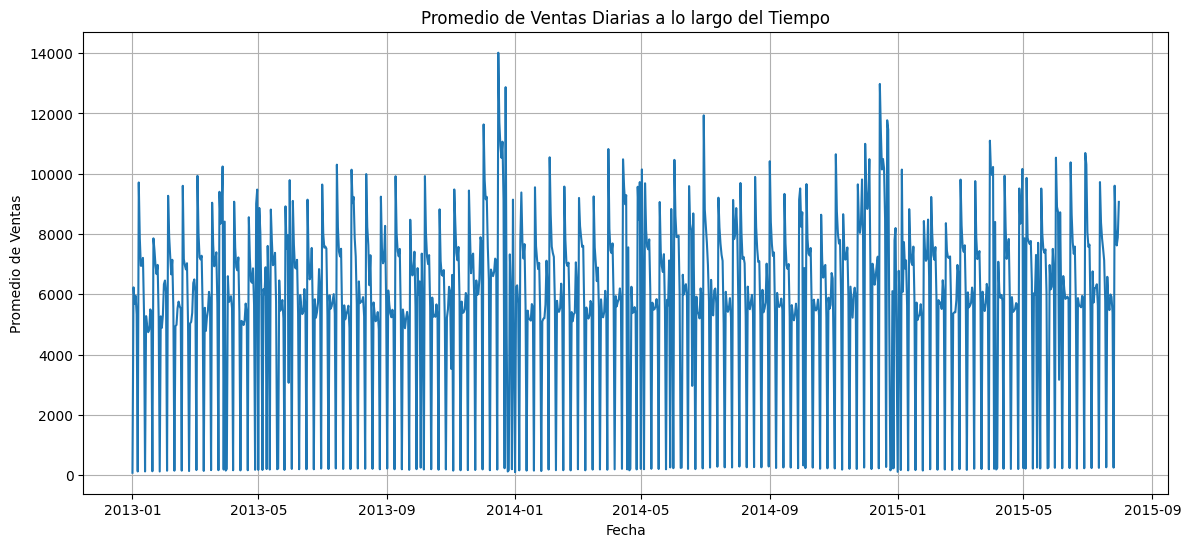

In [38]:
# Convertir la columna 'Date' a datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Visualización de ventas a lo largo del tiempo
plt.figure(figsize=(14, 6))
plt.plot(train_data.groupby('Date')['Sales'].mean())
plt.title('Promedio de Ventas Diarias a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Ventas')
plt.grid(True)
plt.show()

In [39]:
# Calcular el promedio de ventas diarias
daily_sales = train_data.groupby('Date')['Sales'].mean().reset_index()

# Crear el gráfico interactivo
fig = px.line(daily_sales, x='Date', y='Sales', title='Promedio de Ventas Diarias a lo largo del Tiempo')
fig.update_xaxes(rangeslider_visible=True)  
fig.show()


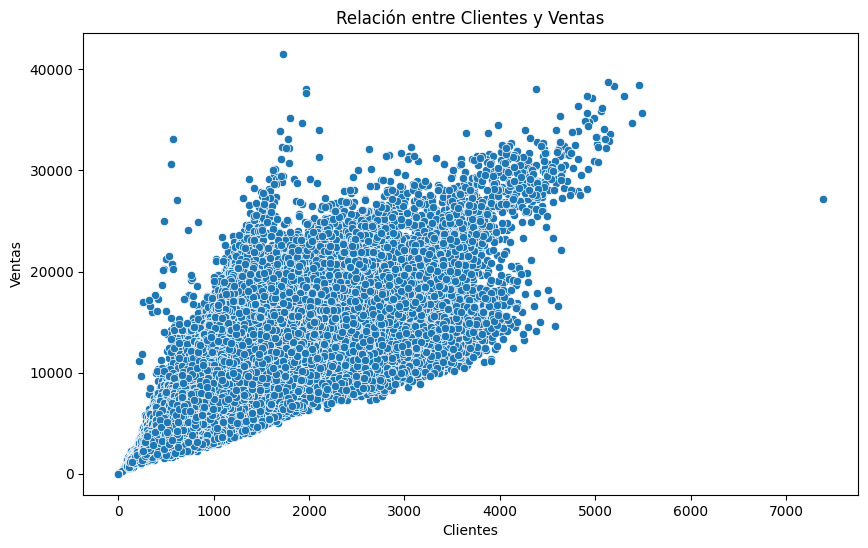

In [61]:
# Relaciones entre características
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=train_data)
plt.title('Relación entre Clientes y Ventas')
plt.xlabel('Clientes')
plt.ylabel('Ventas')
plt.show()

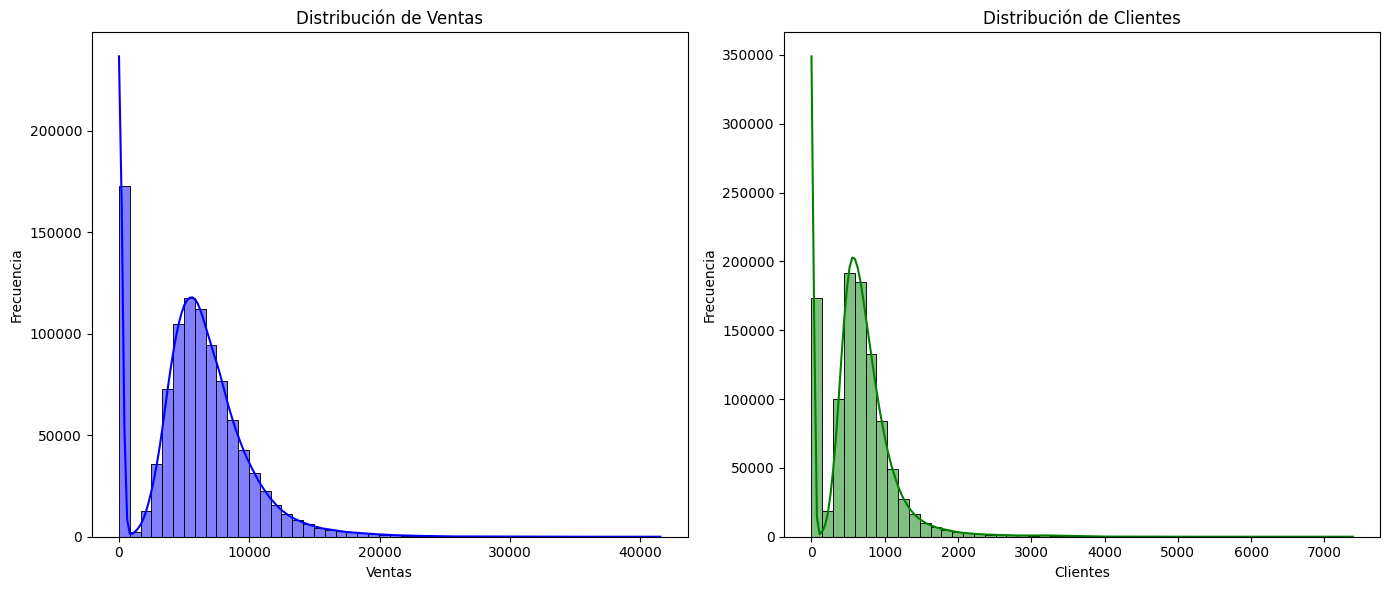

In [40]:
# Histograma de ventas y clientes
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(train_data['Sales'], bins=50, ax=ax[0], kde=True, color='blue')
ax[0].set_title('Distribución de Ventas')
ax[0].set_xlabel('Ventas')
ax[0].set_ylabel('Frecuencia')

sns.histplot(train_data['Customers'], bins=50, ax=ax[1], kde=True, color='green')
ax[1].set_title('Distribución de Clientes')
ax[1].set_xlabel('Clientes')
ax[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Distribuciones Skewness: Las distribuciones tanto de ventas como de clientes son asimétricas, con una cola larga hacia los valores más altos. Esto sugiere que mientras la mayoría de los días tiene ventas moderadas, hay días con ventas excepcionalmente altas que podrían ser explorados más a fondo para entender qué los hace únicos.

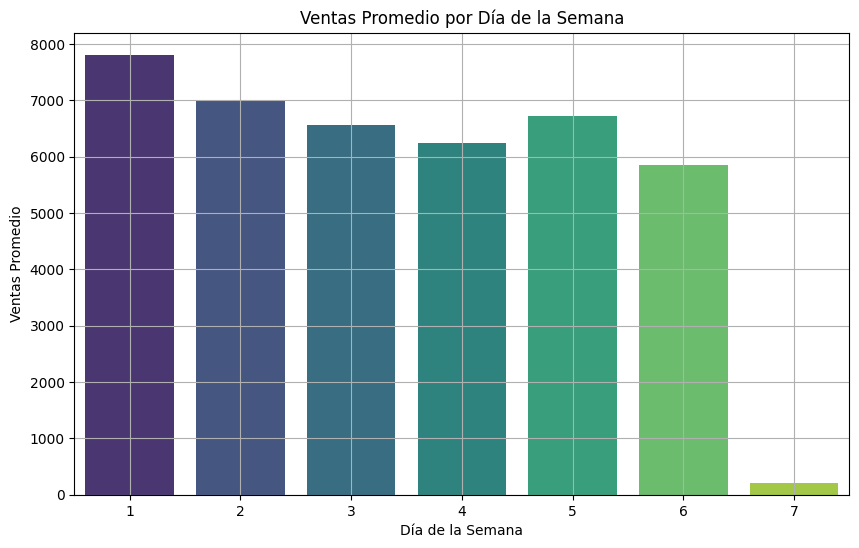

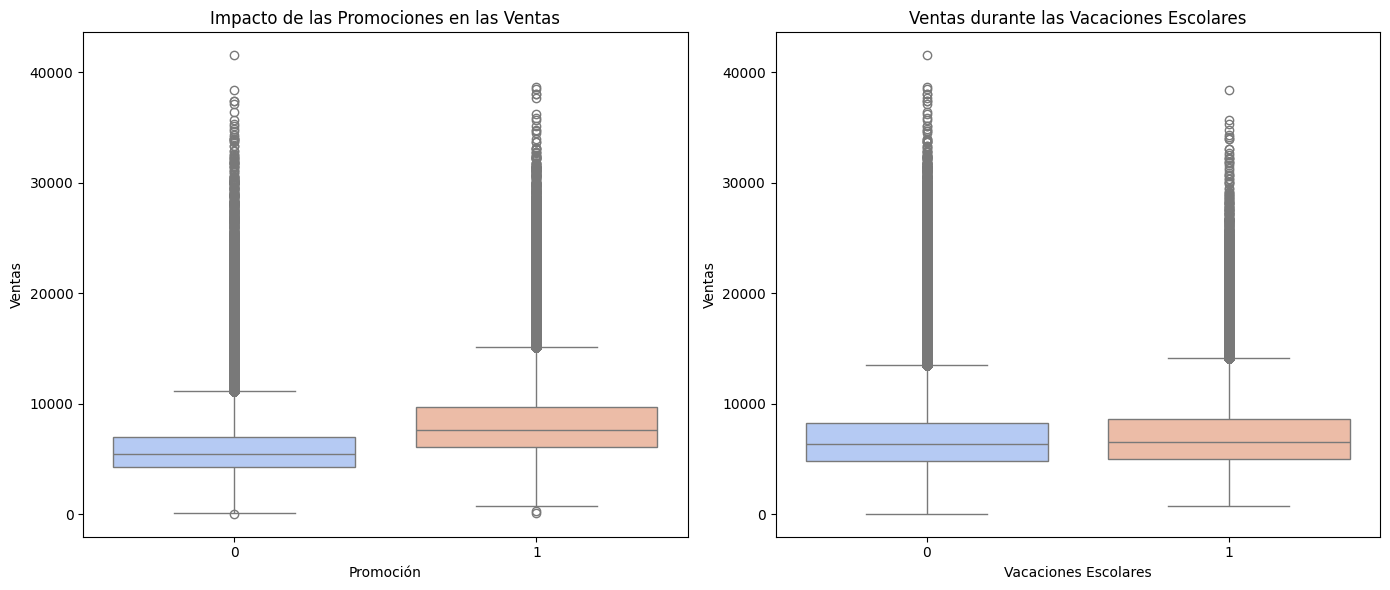

In [41]:
# Configurando el día de la semana con lunes=1, domingo=7
train_data['DayOfWeek'] = pd.Categorical(train_data['DayOfWeek'], categories=[1, 2, 3, 4, 5, 6, 7], ordered=True)

# Ventas por día de la semana
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Sales', data=train_data, estimator=np.mean, ci=None, palette='viridis')
plt.title('Ventas Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Promedio')
plt.grid(True)
plt.show()

# Impacto de las promociones y vacaciones escolares en las ventas
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Promo', y='Sales', data=train_data[train_data['Sales'] > 0], ax=ax[0], palette='coolwarm')
ax[0].set_title('Impacto de las Promociones en las Ventas')
ax[0].set_xlabel('Promoción')
ax[0].set_ylabel('Ventas')

sns.boxplot(x='SchoolHoliday', y='Sales', data=train_data[train_data['Sales'] > 0], ax=ax[1], palette='coolwarm')
ax[1].set_title('Ventas durante las Vacaciones Escolares')
ax[1].set_xlabel('Vacaciones Escolares')
ax[1].set_ylabel('Ventas')

plt.tight_layout()
plt.show()


1. Ventas Promedio por Día de la Semana
El gráfico muestra claramente que hay variaciones en las ventas promedio según el día de la semana. Aunque los detalles específicos no están etiquetados, se observa que ciertos días (posiblemente fines de semana) tienen un promedio de ventas significativamente más alto y que el día mas bajo, posiblemente sea domingo.

1. Impacto de las Promociones en las Ventas
El boxplot revela que las ventas son significativamente mayores en días con promociones en comparación con días sin promociones. Esto subraya la eficacia de las promociones en el aumento de las ventas.

1. Ventas durante las Vacaciones Escolares
Las ventas durante las vacaciones escolares parecen ser ligeramente superiores en comparación con los días normales, aunque la diferencia no es tan marcada como la observada con las promociones. Esto sugiere que las vacaciones escolares tienen un efecto positivo pero más moderado en las ventas.

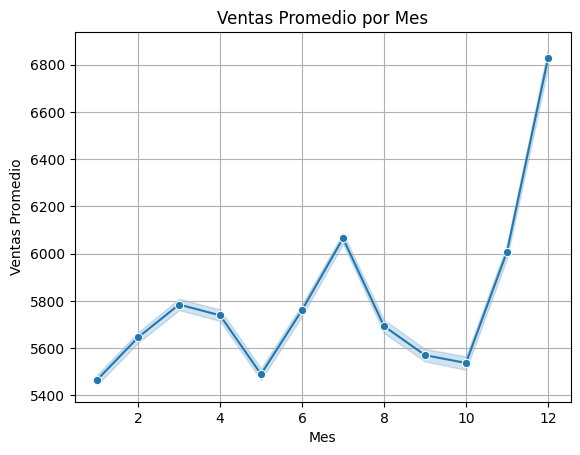

In [42]:
# # Creación de nuevas características derivadas de la fecha
train_data['Month'] = train_data['Date'].dt.month

sns.lineplot(x='Month', y='Sales', data=train_data, estimator=np.mean, marker='o')
plt.title('Ventas Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio')
plt.grid(True)
plt.show()


Patrones Mensuales: El gráfico muestra un incremento notable en ventas hacia el final del año, alcanzando un pico en diciembre. Este patrón estacional es crítico para la planificación anual y estrategias de stock.

Ligero aumento de ventas en días festivos escolares

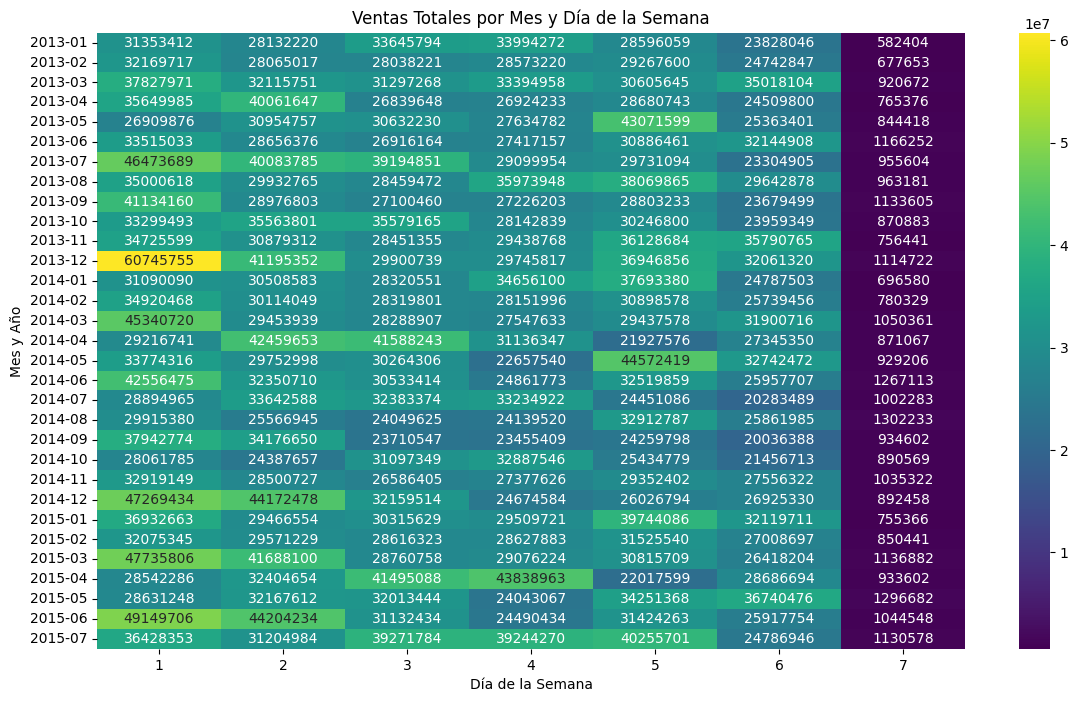

In [46]:
# Crear una columna 'YearMonth' para agrupación
train_data['YearMonth'] = train_data['Date'].dt.to_period('M')

# Pivotar datos para el heatmap
sales_pivot = train_data.pivot_table(values='Sales', index='YearMonth', columns='DayOfWeek', aggfunc='sum')

plt.figure(figsize=(14, 8))
sns.heatmap(sales_pivot, annot=True, fmt=".0f", cmap='viridis')
plt.title('Ventas Totales por Mes y Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Mes y Año')
plt.show()


In [47]:
# Análisis descriptivo de las tiendas involucradas en Promo2 y los intervalos de promociones
promo2_summary = store_data['Promo2'].value_counts(normalize=True)
promo_intervals = store_data['PromoInterval'].value_counts()

promo2_summary, promo_intervals


(Promo2
 1    0.512108
 0    0.487892
 Name: proportion, dtype: float64,
 PromoInterval
 Jan,Apr,Jul,Oct     335
 Feb,May,Aug,Nov     130
 Mar,Jun,Sept,Dec    106
 Name: count, dtype: int64)

Participación en Promo2:

Aproximadamente el 51.2% de las tiendas están involucradas en promociones continuas (Promo2).

y el 48.8% restante de las tiendas no participan en Promo2.



Distribución de PromoInterval:

Jan,Apr,Jul,Oct: 335 tiendas tienen promociones en estos meses.

Feb,May,Aug,Nov: 130 tiendas participan en promociones durante estos meses.

Mar,Jun,Sep,Dec: 106 tiendas tienen promociones en estos meses.

In [48]:
# Unir los datos de tiendas con los datos de entrenamiento
merged_data = pd.merge(train_data, store_data, on='Store')

# Convertir la columna 'Date' en el dataframe unido a datetime (si aún no está convertida)
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Función para determinar si un registro cae dentro del intervalo de promoción
def in_promo_interval(row):
    if pd.isna(row['PromoInterval']):
        return False
    month = row['Date'].month
    month_str = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
                 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}[month]
    return month_str in row['PromoInterval']

# Aplicar la función a los datos unidos
merged_data['IsPromoMonth'] = merged_data.apply(in_promo_interval, axis=1)

# Análisis de ventas durante y fuera de los meses de Promo2
promo_sales_comparison = merged_data[merged_data['Promo2'] == 1].groupby('IsPromoMonth')['Sales'].mean()

promo_sales_comparison


IsPromoMonth
False    5439.322804
True     5393.865852
Name: Sales, dtype: float64

Observando los datos, parece que no hay una diferencia significativa en las ventas entre los meses de promoción y los de no promoción para las tiendas con Promo2 acivo.

Puede sugerir que las promociones no está surtiendo efecto, o que otros factores podrían estar influyendo en estos periodos.

## EDA store

In [50]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [51]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [52]:
# Calcular la suma de valores NaN para cada columna
missing_values_count = store_data.isna().sum()

# Mostrar los resultados
print(missing_values_count)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


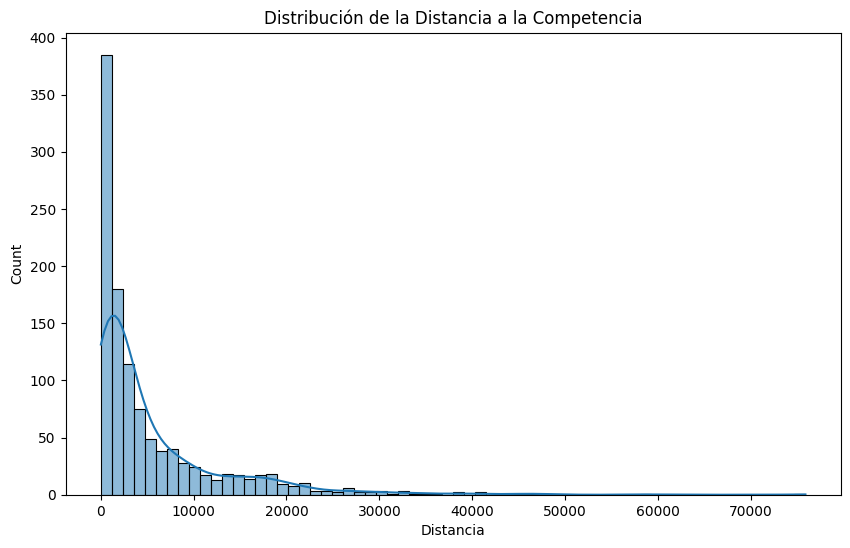

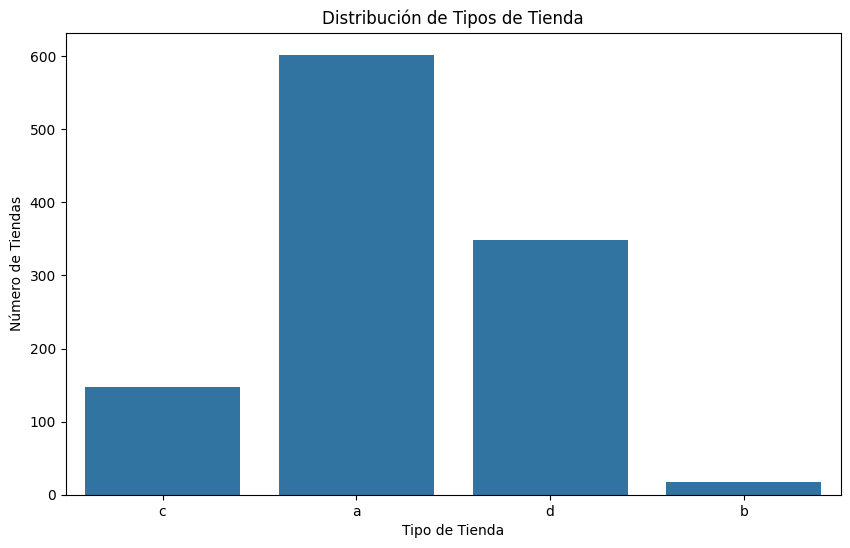

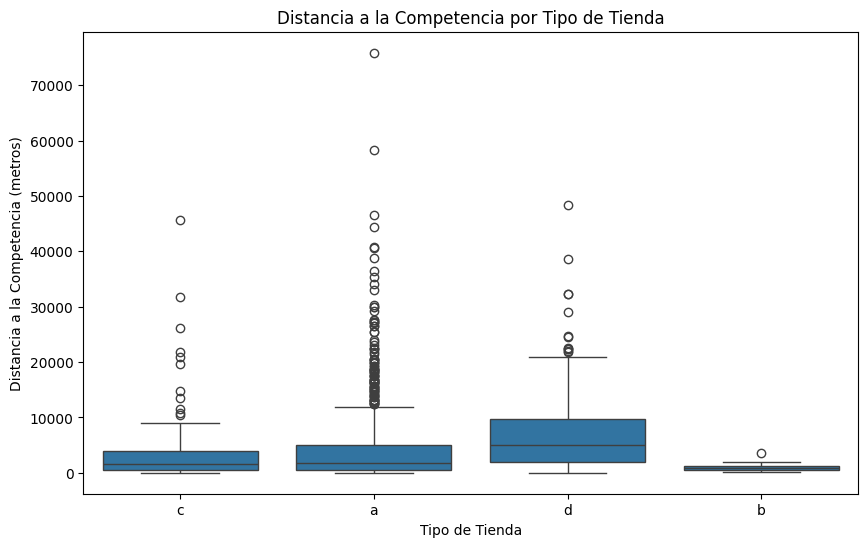

In [53]:
# Visualización de la distribución de CompetitionDistance
plt.figure(figsize=(10, 6))
sns.histplot(store_data['CompetitionDistance'].dropna(), kde=True)
plt.title('Distribución de la Distancia a la Competencia')
plt.xlabel('Distancia')
plt.show()

# Conteo de tipos de tiendas
plt.figure(figsize=(10, 6))
sns.countplot(x='StoreType', data=store_data)
plt.title('Distribución de Tipos de Tienda')
plt.xlabel('Tipo de Tienda')
plt.ylabel('Número de Tiendas')
plt.show()

# Boxplot de CompetitionDistance por StoreType
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='CompetitionDistance', data=store_data)
plt.title('Distancia a la Competencia por Tipo de Tienda')
plt.xlabel('Tipo de Tienda')
plt.ylabel('Distancia a la Competencia (metros)')
plt.show()

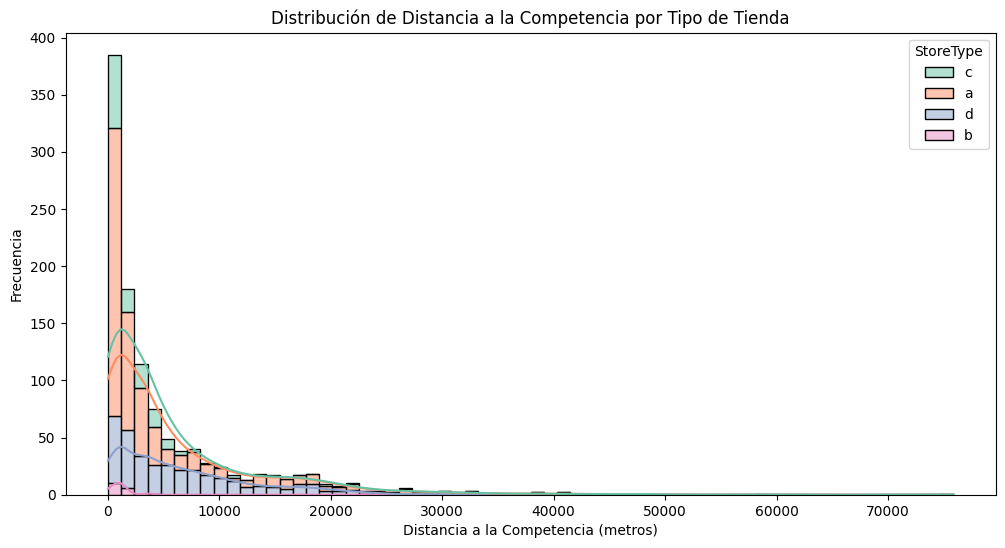

In [54]:
plt.figure(figsize=(12, 6))
sns.histplot(data=store_data, x='CompetitionDistance', hue='StoreType', multiple='stack', palette='Set2', kde=True)
plt.title('Distribución de Distancia a la Competencia por Tipo de Tienda')
plt.xlabel('Distancia a la Competencia (metros)')
plt.ylabel('Frecuencia')
plt.show()


Superposición y Diferenciación: Los tipos de tienda muestran diferentes patrones de distribución, lo que puede ayudar a entender estrategias de ubicación específicas para cada tipo de tienda. Por ejemplo, las tiendas del tipo 'b' tienden a estar más alejadas de sus competidores.

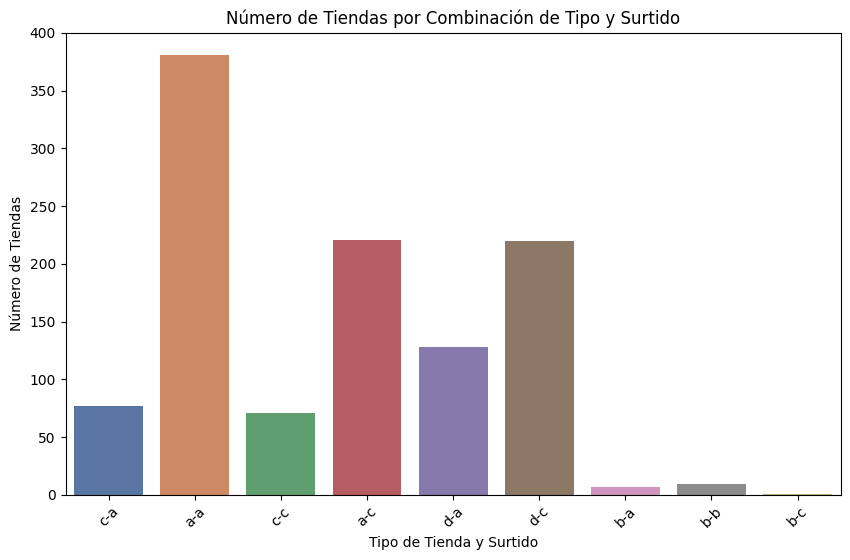

In [55]:
# Crear una columna combinada para tipo de tienda y surtido
store_data['Type_Assortment'] = store_data['StoreType'] + '-' + store_data['Assortment']

plt.figure(figsize=(10, 6))
sns.countplot(data=store_data, x='Type_Assortment', palette='deep')
plt.title('Número de Tiendas por Combinación de Tipo y Surtido')
plt.xlabel('Tipo de Tienda y Surtido')
plt.ylabel('Número de Tiendas')
plt.xticks(rotation=45)
plt.show()


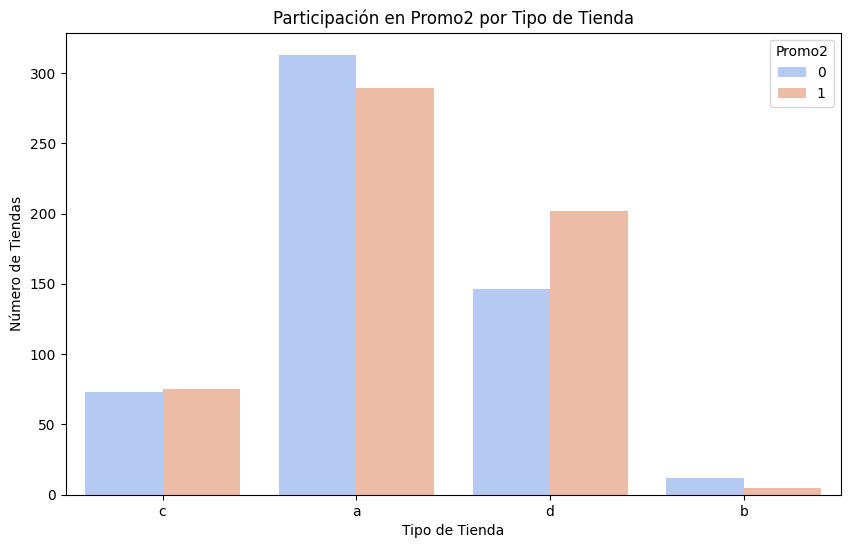

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(data=store_data, x='StoreType', hue='Promo2', palette='coolwarm')
plt.title('Participación en Promo2 por Tipo de Tienda')
plt.xlabel('Tipo de Tienda')
plt.ylabel('Número de Tiendas')
plt.legend(title='Promo2')
plt.show()


Hay diferencias notables en cómo cada tipo de tienda participa en Promo2. Por ejemplo, las tiendas tipo 'a' tienen una mayor adopción de estas promociones en comparación con las tipo 'c'.

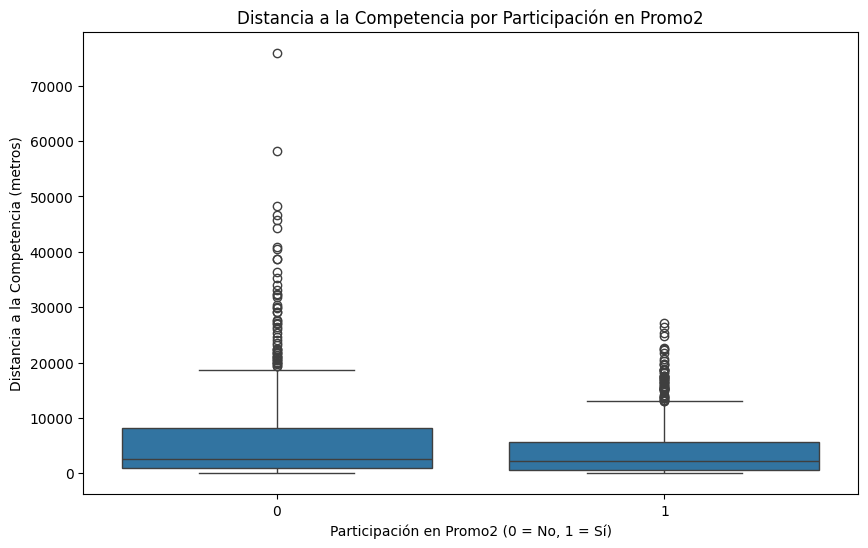

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo2', y='CompetitionDistance', data=store_data)
plt.title('Distancia a la Competencia por Participación en Promo2')
plt.xlabel('Participación en Promo2 (0 = No, 1 = Sí)')
plt.ylabel('Distancia a la Competencia (metros)')
plt.show()


Las tiendas que participan en Promo2 tienden a estar más cerca de sus competidores que aquellas que no participan.

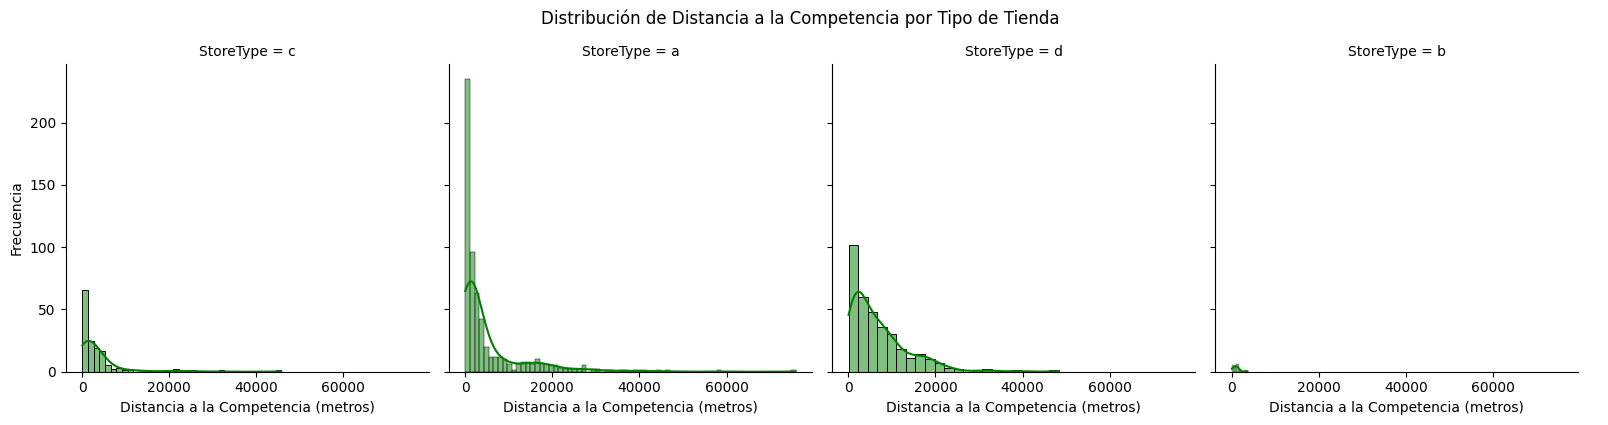

In [58]:
g = sns.FacetGrid(store_data, col='StoreType', height=4, aspect=1)
g.map(sns.histplot, 'CompetitionDistance', kde=True, color='green')
g.add_legend()
g.set_axis_labels('Distancia a la Competencia (metros)', 'Frecuencia')
g.fig.suptitle('Distribución de Distancia a la Competencia por Tipo de Tienda', y=1.05)
plt.show()


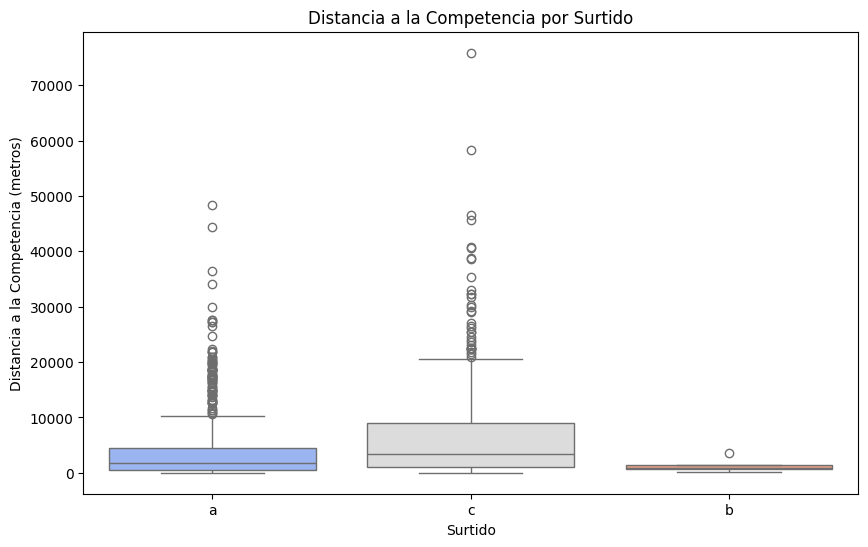

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Assortment', y='CompetitionDistance', data=store_data, palette='coolwarm')
plt.title('Distancia a la Competencia por Surtido')
plt.xlabel('Surtido')
plt.ylabel('Distancia a la Competencia (metros)')
plt.show()


El surtido 'a' muestra una mayor proximidad a competidores, mientras que el surtido 'b' muestra una tendencia a ubicarse más lejos.